# Decay curve of the central spin under driving

**Yuning Zhang, TU Delft, 2021.10.23**

In [30]:
using Plots
using LsqFit
import ProgressMeter: @showprogress
include("SpinEnsemble.jl")

t_adaptive

use moving average function to smoothen the sampled curve

In [2]:
"""
Standard moving average function, with given order and filling option
========================
Args:
    vs: data array 
    n: number of data for smoothing
    order: `:backward` or ':forward', smoothing start from begning/ending of the array
    fill: option, wether to fill the missed data points to keep the array at same length
Return:
    a smoothened array
"""
function moving_average(vs::AbstractArray{<:Number},n::Int; order=:backward, fill=:true)
    l=length(vs)
    if order==:forward
        ma=[sum(vs[i:(i+n-1)])/n for i in 1:l-n+1 ]
        if fill append!(ma,[mean(vs[i:l]) for i in l-n+2:l]) end
        return ma
    elseif order==:backward
        ma=[sum(vs[i-(n-1):i])/n for i in n:l]
        if fill prepend!(ma,[mean(vs[1:i]) for i in 1:n-1]) end
        return ma
    else
        println("Invalid order option")
    end
end;

generate an ensemble of 100 spins, set transverse magnetic field to 2, simulate the dynamics using Monte-Carlo sampling

In [3]:
N=100
D=rand_bath_dipolar_coefs(N,3);
T=0:1e-4:4e-2;
h=2;

set sampling size to 100

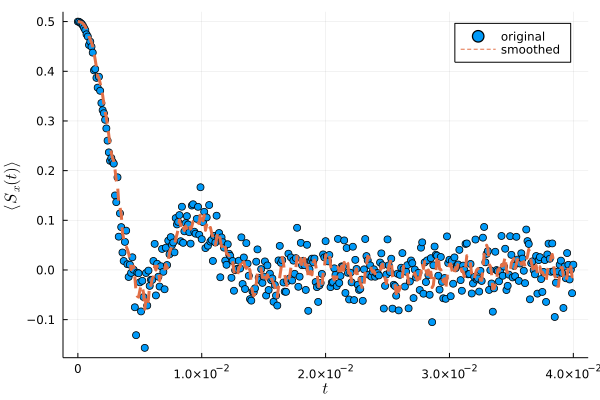

In [28]:
# plot the decay curve using the direct production
f_t=f_sampling(T,D,h;N=100) 
f_smooth=moving_average(f_t,4)
scatter(T,f_t;FID_plot_options...,labels="original")
plot!(T,f_smooth,linestyle = :dash, linewidth=3, label="smoothed")

set sampling size to 1000

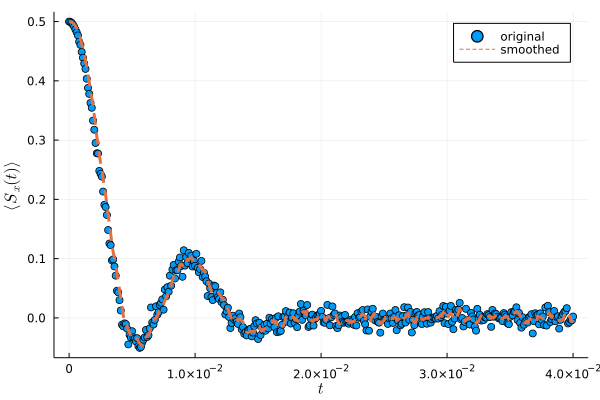

In [27]:
# plot the decay curve using the direct production
f_t=f_sampling(T,D,h;N=1000) 
f_smooth=moving_average(f_t,4)
scatter(T,f_t;FID_plot_options...,labels="original")
plot!(T,f_smooth,linestyle = :dash, linewidth=3, label="smoothed")

set sampling size to 10000

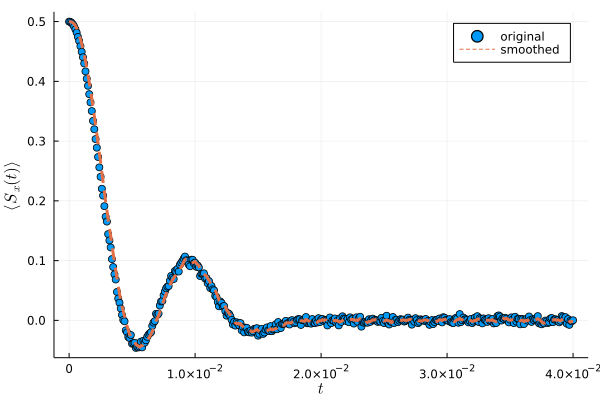

In [29]:
# plot the decay curve using the direct production
f_t=f_sampling(T,D,h;N=10000) 
f_smooth=moving_average(f_t,4)
scatter(T,f_t;FID_plot_options...,labels="original")
plot!(T,f_smooth,linestyle = :dash, linewidth=3, label="smoothed")

In [23]:
K=100
M=10^3
averaged_f=:void
@showprogress for i in 1:K
    D=rand_bath_dipolar_coefs(N,3)
    f_t=f_sampling(T,D,h;N=M) 
    if averaged_f==:void
        averaged_f=f_t/K
    else
        averaged_f+=f_t/K
    end
#     println("progress:{:d}",i)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:32


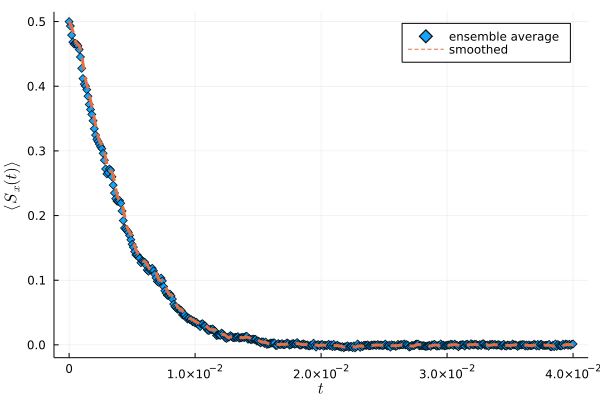

In [24]:
scatter(T,averaged_f;FID_plot_options...,labels="ensemble average", 
    markershape = :d,
    markersize = 4,
    markeralpha = 0.9,
)
plot!(T,moving_average(averaged_f,4),linestyle = :dash, linewidth=3, label="smoothed")

In [191]:
N=200
D=rand_bath_dipolar_coefs(N,3);
T=0:1e-4:2e-2;
h=2;

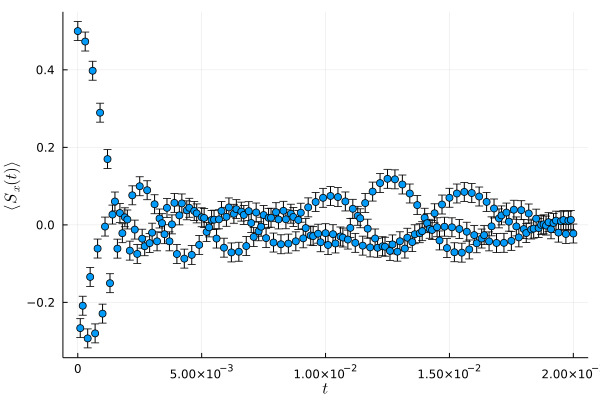

In [192]:
# plot the decay curve using the direct production
f_t,f_var=f_sampling(T,D,h;N=100) 
scatter(T,f_t;FID_plot_options...,labels=:false,yerror=std(f_var))

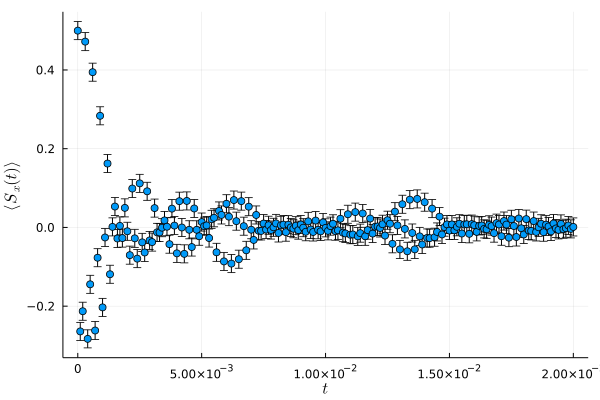

In [194]:
# plot the decay curve using the direct production
f_t,f_var=f_sampling(T,D,h;N=1000) 
scatter(T,f_t;FID_plot_options...,labels=:false,yerror=std(f_var))

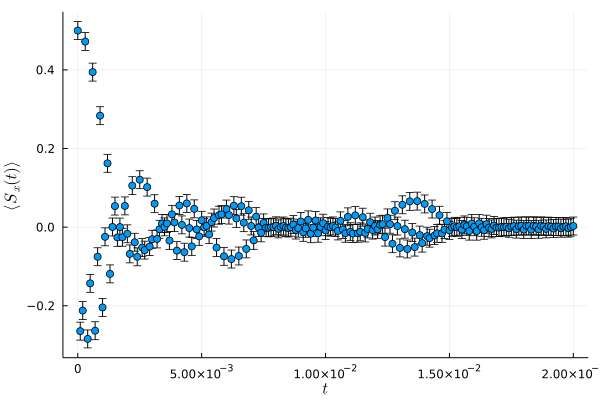

In [195]:
# plot the decay curve using the direct production
f_t,f_var=f_sampling(T,D,h;N=10000) 
scatter(T,f_t;FID_plot_options...,labels=:false,yerror=std(f_var))

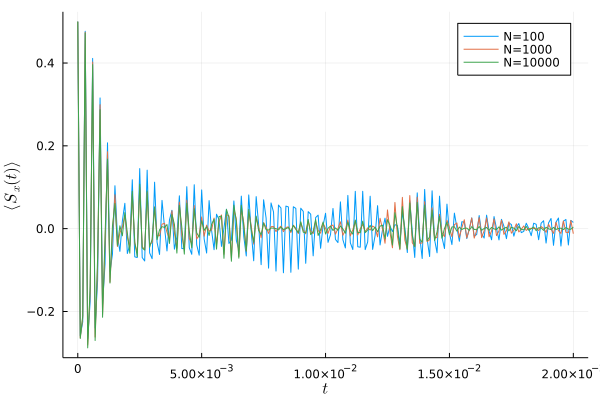

In [196]:
f_t,f_var=f_sampling(T,D,h;N=100) 
plot(T,f_t;FID_plot_options...,labels="N=100")
f_t,f_var=f_sampling(T,D,h;N=1000) 
plot!(T,f_t;FID_plot_options...,labels="N=1000")
f_t,f_var=f_sampling(T,D,h;N=10000) 
plot!(T,f_t;FID_plot_options...,labels="N=10000")

In [197]:
K=100
M=10^3
averaged_f=:void
@showprogress for i in 1:K
    D=rand_bath_dipolar_coefs(N,3)
    f_t,f_var=f_sampling(T,D,h;N=M) 
    if averaged_f==:void
        averaged_f=f_t/K
    else
        averaged_f+=f_t/K
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


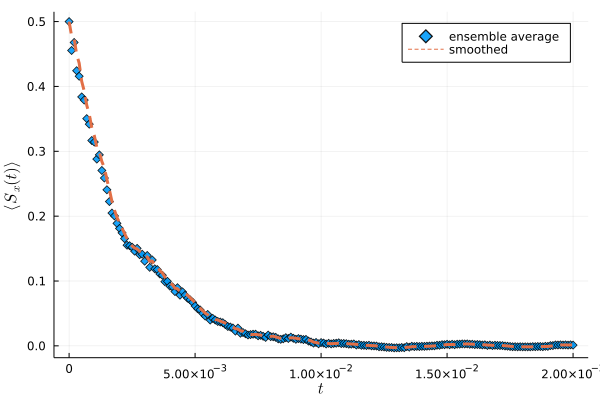

In [198]:
scatter(T,averaged_f;FID_plot_options...,labels="ensemble average", 
    markershape = :d,
    markersize = 4,
    markeralpha = 0.9,
)
plot!(T,moving_average(averaged_f,3),linestyle = :dash, linewidth=3, label="smoothed")

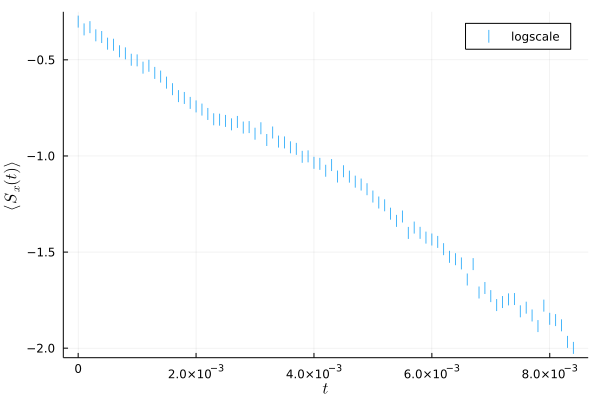

In [199]:
cutoff=85
X=T[1:cutoff]
Y=(averaged_f)[1:cutoff]
m(t,p)=p[1]*t.+p[2]
p0=[-1.0,0.0]
fit = curve_fit(m, X, log10.(Y), p0);

scatter(X,log10.(Y);FID_plot_options...,labels="logscale", 
    markershape = :vline,
    markersize = 6,
    markeralpha = 0.9,
#     markercolor=:red,
)
# plot!(X,m(X,fit.param),linestyle=:dash,linewidth=3,label="linear fitting")

In [200]:
K=100
averaged_f=:void
@showprogress for i in 1:K
    D=rand_bath_dipolar_coefs(N,3)
    f_t=ensemble_FID(T,D) 
    if averaged_f==:void
        averaged_f=f_t/K
    else
        averaged_f+=f_t/K
    end
end

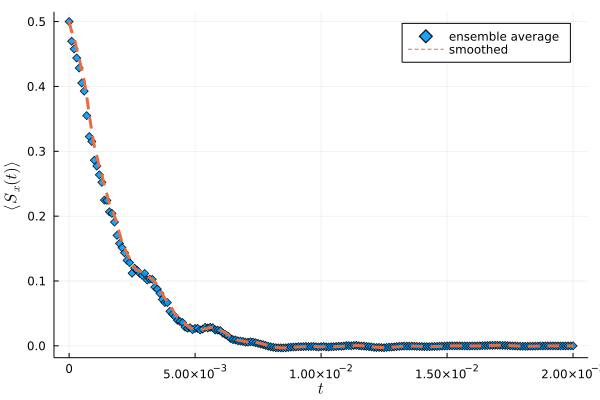

In [201]:
scatter(T,averaged_f;FID_plot_options...,labels="ensemble average", 
    markershape = :d,
    markersize = 4,
    markeralpha = 0.9,
)
plot!(T,moving_average(averaged_f,3),linestyle = :dash, linewidth=3, label="smoothed")

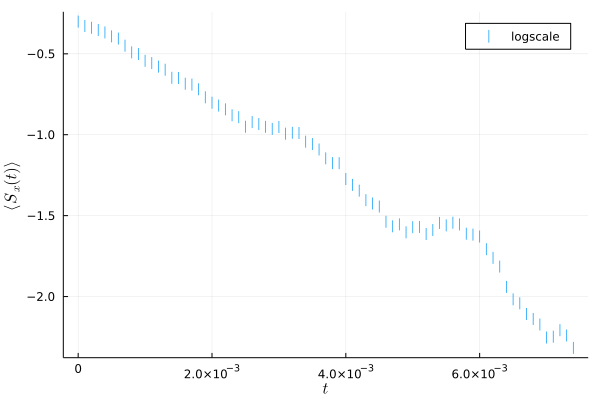

In [205]:
cutoff=75
X=T[1:cutoff]
Y=(averaged_f)[1:cutoff]
m(t,p)=p[1]*t.+p[2]
p0=[-1.0,0.0]
fit = curve_fit(m, X, log10.(Y), p0);

scatter(X,log10.(Y);FID_plot_options...,labels="logscale", 
    markershape = :vline,
    markersize = 6,
    markeralpha = 0.9,
#     markercolor=:red,
)
# plot!(X,m(X,fit.param),linestyle=:dash,linewidth=3,label="linear fitting")